<a href="https://colab.research.google.com/github/nochwysid/CSE5008-SP/blob/main/5_SciProg_SciPy_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 5 - SciPy

What we have seen so far
- Basic python language features
- Introduction to NumPy
- Plotting using matplotlib

Scipy is a collection of packages that provide useful mathematical functions commonly used for scientific computing.

List of subpackages
- cluster : Clustering algorithms
- constants : Physical and mathematical constants
- fftpack : Fast Fourier Transform routines
- integrate : Integration and ordinary differential equation solvers
- interpolate : Interpolation and smoothing splines
- io : Input and Output
- linalg : Linear algebra
- ndimage : N-dimensional image processing
- odr : Orthogonal distance regression
- optimize : Optimization and root-finding routines
- signal : Signal processing
- sparse : Sparse matrices and associated routines
- spatial : Spatial data structures and algorithms
- special : Special functions
- stats : Statistical distributions and functions

We cannot cover all of them in detail but we will go through some of the packages and their capabilities today

- interpolate
- optimize
- stats
- integrate

We will also briefly look at some other useful packages
- networkx
- sympy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la
import scipy.interpolate as interp

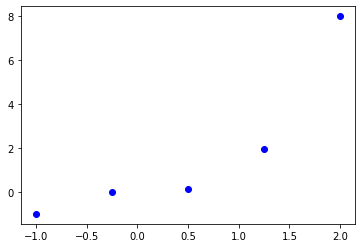

In [ ]:
x = np.linspace(-1,2,5);
y = x**3
plt.plot(x,y,'bo')

In [ ]:
f = interp.interp1d(x,y,kind="linear")

In [ ]:
type(f)

scipy.interpolate.interpolate.interp1d

In [ ]:
f(0.2)

array(0.06875)

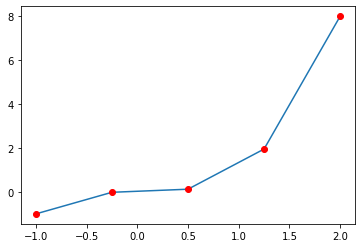

In [ ]:
# connect the dots using plot with func
x_fine = np.linspace(-1,2,100)
plt.plot(x_fine,f(x_fine))

plt.plot(x,y,'ro')

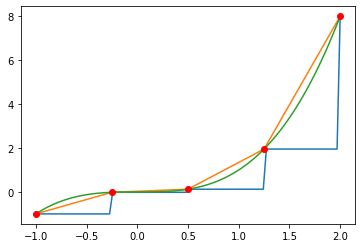

In [ ]:
# three levels of interpolation
plt.plot(x_fine,interp.interp1d(x,y,kind="zero")(x_fine))
plt.plot(x_fine,interp.interp1d(x,y,kind="linear")(x_fine))
plt.plot(x_fine,interp.interp1d(x,y,kind="cubic")(x_fine))
plt.plot(x,y,'ro')

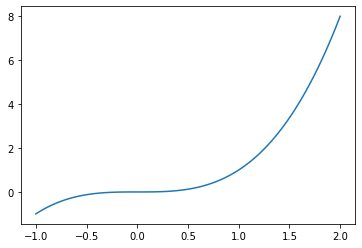

In [ ]:
# the actual func being interpolated
x1 = np.linspace(-1,2,100)
y1 = x1**3
plt.plot(x1,y1)

In [ ]:
interp.interp2d?

## Optimization : `scipy.optimize`

Contains functions to find minima, roots and fit parameters 

In [ ]:
from scipy import optimize

In [ ]:
# create a function to be optimized
def f(x):
    return x**4 -10*x**2 

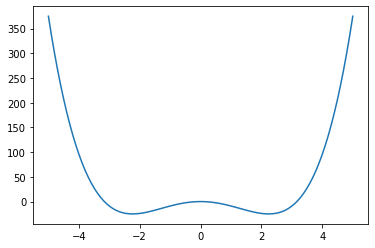

In [ ]:
x = np.linspace(-5,5,100)
plt.plot(x,f(x));

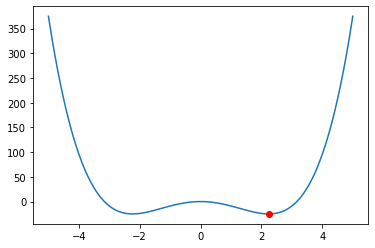

In [ ]:
# try plotting the f(x_opt) by itself, just comment out the line below
plt.plot(x,f(x));
results = optimize.minimize(f, 1)
x_opt = results.x
plt.plot(x_opt,f(x_opt),'ro');

$$f(x)=x^4_0-10x^2_0+(x_1-1)^2$$
$$\hspace{58pt}=x[0]^4-10*x[0]^2+(x[1]-1)^2$$

In [ ]:
# x[i] is x_i
def f(x):
    return x[0]**4 -10*x[0]**2 + (x[1]-1)**2

results = optimize.minimize(f, np.array([1,0]),bounds=[(-1,2),(-3,3)])
results

      fun: -23.999999999999996
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-7.99999960e+00, -3.55271368e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 9
      nit: 2
   status: 0
  success: True
        x: array([2.        , 0.99999995])

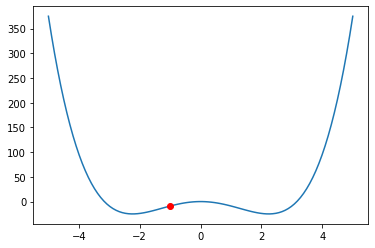

In [ ]:
def f(x):
    return x**4 -10*x**2 


plt.plot(x,f(x));
results = optimize.minimize(f, -0.5, bounds=[(-1,2)])
x_opt = results.x
plt.plot(x_opt,f(x_opt),'ro');



In [ ]:
results

      fun: array([-9.])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([16.00000008])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 1
   status: 0
  success: True
        x: array([-1.])

In [ ]:
optimize.minimize?

In [ ]:
def f(x):
    return x[0]*x[0] + x[1]*x[1] + 5*(np.sin(2*x[0]) + np.sin(2*x[1]) )

In [ ]:
np.meshgrid?

In [ ]:
x=np.linspace(-5,5,100)
y=np.linspace(-5,5,100)
#meshgrid transposes 2nd arg, broadcasts both args
X,Y = np.meshgrid(x,y)

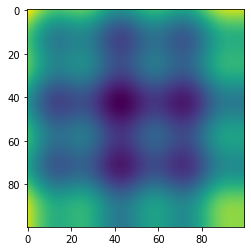

In [ ]:
plt.imshow(X*X+ Y*Y + 5*(np.sin(2*X) + np.sin(2*Y)))

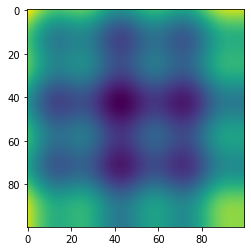

In [ ]:
plt.imshow(f(np.array([X,Y])))

In [ ]:
results = optimize.minimize(f,x0=[1,1])
x_opt , y_opt = results.x
results


      fun: 0.07912876341637087
 hess_inv: array([[ 0.52496597, -0.47503403],
       [-0.47503403,  0.52496597]])
      jac: array([3.21865082e-06, 3.21865082e-06])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 3
     njev: 8
   status: 0
  success: True
        x: array([2.13554782, 2.13554782])

In [ ]:
f(results.x)

0.07912876341637087

## Curve Fitting

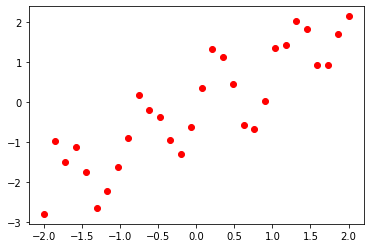

In [ ]:
x = np.linspace(-2,2,30)
#use of random to generate noise, making it seem more realistic
y = x+np.sin(6.5*x)+0.3*np.random.randn(30)
plt.plot(x,y,'ro')

In [ ]:
def f(x,a,b):
    return a*x +b

In [ ]:
((a,b),_) = optimize.curve_fit(f,x,y,(0,1))
a,b

(0.9957586515373085, -0.14097831857615217)

In [ ]:
optimize.curve_fit?

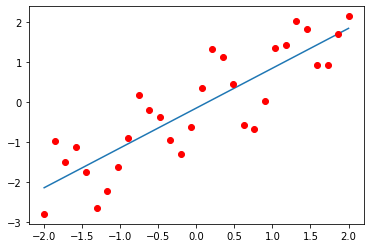

In [ ]:
x_fine = np.linspace(-2,2,200)
plt.plot(x_fine,f(x_fine,a,b))
plt.plot(x,y,'ro')

In [ ]:
a,b

(0.9957586515373085, -0.14097831857615217)

In [ ]:
def g(x,a,b,c):
    return a*x +b*np.sin(c*x)

In [ ]:
((a,b,c),_) = optimize.curve_fit(g,x,y,(1.5,0,7))
a,b,c

(1.0766476626179984, 0.9700243917318141, 6.400274930630166)

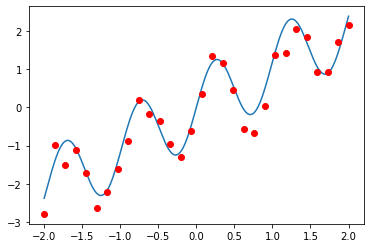

In [ ]:
x_fine = np.linspace(-2,2,200)
plt.plot(x_fine,g(x_fine,a,b,c))
plt.plot(x,y,'ro')

### Root Finding

In [ ]:
def f(x):
    return np.sin(x)

In [ ]:
r = optimize.root(f,2)
r.x

array([3.14159265])

In [ ]:
f(r.x)

array([1.2246468e-16])

## Linear programming
A very common case is linear programming (LP). These are optimization problems that can be written in the form

$$
\hspace{10pt}\text{minimize} \hspace{30pt} c^T x  \\
\hspace{20pt}\text{subject to} \hspace{10pt} A_{ub} x \leq b_{ub} \\
\hspace{75pt} A_{eq}x = b_{eq}
$$

Here, we are finding the vector $x$ that minimizes the dot product $c^T x$, where $c$ is some fixed vector, out of all $x$ that satisfy $A_{ub}x \leq b_{ub}$ and $A_{eq}x = b_{eq}$, where $A_{ub}$ and $A_{eq}$ are matrices and $b_{ub}$ and $b_{eq}$ are vectors.

## Exercise
Using Google and reading documentation are important parts of programming. `scipy.optimize` comes with specialized functions for solving linear programming problems.

Figure out how to solve LPs using `scipy.optimize`, and solve the following LP:
<!--
$$
\begin{equation}
\begin{split}
\text{minimize} \hspace{30pt} & x_1 + 2 x_2  \\
\text{subject to} \hspace{30pt} & x_1 \leq 1 \\
& 5 x_1 + x_2 \geq 0
\end{split}
\end{equation}
$$
-->

$$
\hspace{20pt} \text{minimize} \hspace{18pt}  x_1 + 2 x_2   \\
\hspace{10pt} \text{subject to} \hspace{15pt}  x_1 \leq 1 \\
\hspace{40pt} 5 x_1 + x_2 \geq 0
$$

Note that the problem is equivalent to

$$
\hspace{10pt}\text{minimize} \hspace{30pt} c^T x  \\
\hspace{20pt}\text{subject to} \hspace{10pt} A_{ub} x \leq b_{ub} \\
\hspace{75pt} A_{eq}x = b_{eq}
$$
where
$$
c = \begin{pmatrix} 1 \\ 2 \end{pmatrix} \qquad 
A_{ub} = \begin{pmatrix} 1 & 0 \\ -5 & -1 \end{pmatrix}, \qquad
b_{ub} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \qquad
A_{eq} = 0, \qquad
b_{eq} = 0.
$$

We can see this because 
$$
 \begin{pmatrix} 1 & 0 \\ -5 & -1 \end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \end{pmatrix} \leq \begin{pmatrix} x_1 \\ -5x_1 - x_2 \end{pmatrix} 
$$

In [ ]:
optimize?

In [ ]:
c = np.array([1,2])
Aub = np.array([[1,0],[-5,-1]])
bub = np.array([1,0])
x1_bounds = (None, None)
x2_bounds = (None, None)
results = optimize.linprog(c,A_ub=Aub, b_ub = bub, bounds = [x1_bounds, x2_bounds])

results

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


     con: array([], dtype=float64)
     fun: -8.999999998572182
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([ 2.03519868e-10, -2.01930028e-10])
  status: 0
 success: True
       x: array([ 1., -5.])

In [ ]:
Aub @ results.x - bub

array([-2.03519868e-10,  2.01930028e-10])

## Statistics : `scipy.stats`

In [ ]:
from scipy import stats

Find the maximum likelihood estimate for parameters

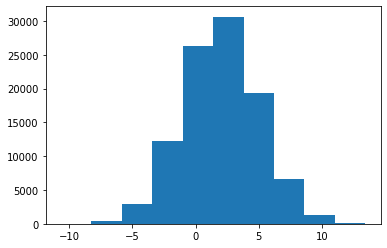

In [ ]:
samples = 3*np.random.randn(100000)+2
plt.hist(samples);

In [ ]:
#return the mean and variance
stats.norm.fit(samples)

(1.9949370213185649, 2.9972759141507215)

In [ ]:
a = np.random.randn(300)
b = np.random.randn(300)+ 0.3

In [ ]:
#t test for independent distributions to see if they have equal means
stats.ttest_ind(a,b)

Ttest_indResult(statistic=-4.26738514595292, pvalue=2.2992221728244038e-05)

In [ ]:
a = np.random.randn(300)
b = np.random.randn(300)/2 + a/2

In [ ]:
stats.pearsonr?

In [ ]:
b = b-sum(b)/b.shape[0]

In [ ]:
stats.pearsonr(a,b)

(0.7015083150544965, 9.465290413322375e-46)

You can also perform kernel density estimation

In [ ]:
x = np.hstack(( 2*np.random.randn(1000)+5,  0.6*np.random.randn(1000)-1) )

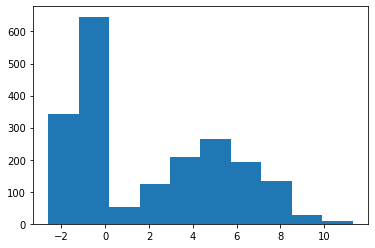

In [ ]:
plt.hist(x);

In [ ]:
#use gaussian like kernel density estimator to generate a point density function
pdf = stats.kde.gaussian_kde(x)

In [ ]:
type(pdf)

scipy.stats.kde.gaussian_kde

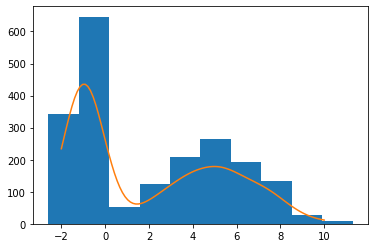

In [ ]:
counts,bins,_ = plt.hist(x)
x_fine=np.linspace(-2,10,100)
plt.plot(x_fine,np.sum(counts)*pdf(x_fine))

## Numerical Integration : `scipy.integrate`

In [ ]:
import scipy.integrate as integ

You can compute integral using the `quad` funtion

In [ ]:
def f(x):
    return x**2 + 5*x + np.sin(x)

In [ ]:
integ.quad(f,0,1)

(3.2930310274651937, 3.655998867496894e-14)

In [ ]:
integ.quad?

You can also solve ODEs of the form
$$ \frac{dy}{dt} = f(y,t) $$

In [ ]:
def f(y,t):
    return (y[1], -y[1]-9*y[0])

In [ ]:
t = np.linspace(0,10,100)
Y = integ.odeint(f,[1,1],t)

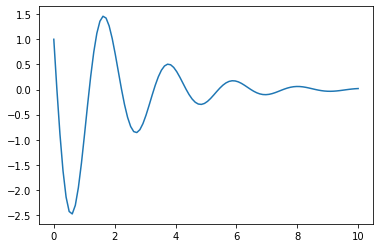

In [ ]:
plt.plot(t,Y[:,1])

## Physical simulation
Let's simulate a throwing a ball in two dimensions. The ball is described as a function of time by four functions: $x(t), y(t), v_x(t), v_y(t)$, which are governed by the ODE system:

$$
    \frac{dx}{dt} = v_x, \qquad
    \frac{dy}{dt} = v_y, \qquad
    \frac{dv_x}{dt} = 0, \qquad
    \frac{dv_y}{dt} = -g.
$$

We can think of this in vectorized form as:

$$
    \frac{d}{dt} \begin{pmatrix} x \\ y \\ v_x \\ v_y \end{pmatrix} = \begin{pmatrix} v_x \\ v_y \\ 0 \\ -g \end{pmatrix}
$$

In [ ]:
integ.odeint?

In [ ]:
def dzdt(z, t):
    x, y, vx, vy = z
    g = 1
    return np.array([vx, vy, 0, -g])

In [ ]:
import matplotlib.pyplot as plt

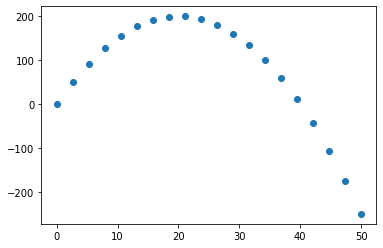

In [ ]:
x, y = 0, 0
vx, vy = 1, 20
z = np.array([x, y, vx, vy])
t = np.linspace(0, 50, 20)

result = integ.odeint(dzdt, z, t)

plt.scatter(result[:, 0], result[:, 1])
plt.show()

## Exercise
We can add drag with the following slight modification to the ODE, which adds a force with direction opposing the current velocity, and with magnitude proportional to the velocity squared.
    
$$
    \frac{d}{dt} \begin{pmatrix} x \\ y \\ v_x \\ v_y \end{pmatrix} = \begin{pmatrix} v_x \\ v_y \\ -\alpha v_x \sqrt{v_x^2 + v_y^2} \\ -g -\alpha v_y \sqrt{v_x^2 + v_y^2} \end{pmatrix}
$$

Implement this with $\alpha = 0.001$, plot the resulting trajectory, and compare to the dragless case.

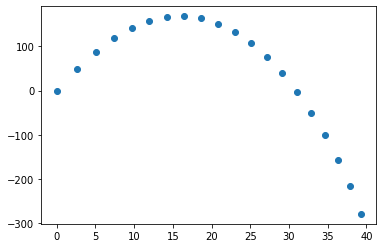

In [ ]:
def dzdt(z, t):
    x, y, vx, vy = z
    g = 1
    a = 0.001
    return np.array([vx, vy, 0-a*vx*np.sqrt(vx*vx+vy*vy), -g-a*vy*np.sqrt(vx*vx+vy*vy)])

x, y = 0, 0
vx, vy = 1, 20
z = np.array([x, y, vx, vy])
t = np.linspace(0, 50, 20)

result = integ.odeint(dzdt, z, t)
#why not plot them in same frame?
plt.scatter(result[:, 0], result[:, 1])
plt.show()

# Other useful packages

## `networkx`
Useful Package to handle graphs.

Install by running `conda install networkx`

In [ ]:
import networkx as nx

In [ ]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4])
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,1)
G.add_edge(3,4)


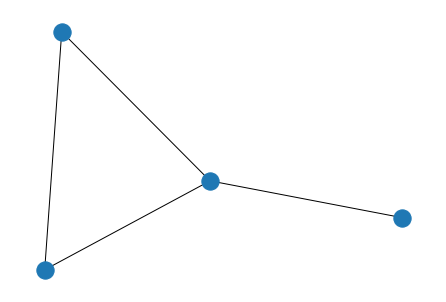

In [ ]:
nx.draw(G)

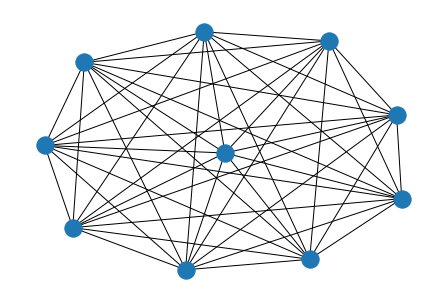

In [ ]:
G = nx.complete_graph(10)
nx.draw(G)

## `sympy`

Package for performing symbolic computation and manipulation.

Install it in your environment by running `conda install sympy`

In [ ]:
from sympy import *

In [ ]:
x,y = symbols("x y")

In [ ]:
x

x

In [ ]:
expr = x+y**2

In [ ]:
expr

x + y**2

In [ ]:
# in colab run this to get latex output
# init_printing(use_latex='matplotlib')

In [ ]:
x*expr

x*(x + y**2)

In [ ]:
expand(x*expr)

x**2 + x*y**2

In [ ]:
factor(x**2 - y**2)

(x - y)*(x + y)

In [ ]:
latex(expr)

'x + y^{2}'

In [ ]:
simplify( (x-y)**2 + (x+y)**2)

2*x**2 + 2*y**2

In [ ]:
x**2/(y**3+y)

x**2/(y**3 + y)

In [ ]:
(x**2/(y**3+y)).subs(y,1/(1+x)).simplify()

x**2*(x + 1)**4/(x + (x + 1)**3 + 1)

In [ ]:
(x**2/(y**3+y)).evalf(subs={'x':2, 'y':4})
# 4/(64+4)

0.0588235294117647

In [ ]:
Integral(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

Integral(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

In [ ]:
I = Integral(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

In [ ]:
I.doit()

pi

In [ ]:
(sin(x)/(1+cos(x)))

sin(x)/(cos(x) + 1)

In [ ]:
(sin(x)/(1+cos(x))).series(x,0,10)

x/2 + x**3/24 + x**5/240 + 17*x**7/40320 + 31*x**9/725760 + O(x**10)

## Extra Exercises
The following exercises requires the combined usage of the packages we learnt today. 

1. Generate 10 random polynomials of order 4
    - Numerically and analytically integrate them from 0 to 1 and compare the answers.
    - Compute a minima for each polynomial and if it exists show that the analytically computed derivative is 0 at the minima
    - Randomly sample the polynomials in the range from 0 to 1, and see if you can recover the original coefficents by trying to fit a 4th order polynomial to the samples.
2. Read and learn about [Erdos-Renyi Random Graphs](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model). See if you can numerically verify some of the properties mentioned in the wiki, such as for what parameter values is the graph most likely connected.
3. Fit a quadratic curve to the drag-dampened ODE above. What does the error in the model look like?